In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")
completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")
completed3=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details.xlsx")
incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 1, 2024 - Apr 14, 2024.csv")
incompleted2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 15, 2024 - Apr 30, 2024.csv")
incompleted3=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - May 1, 2024 - May 20, 2024.csv")

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2753/2198419674.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2753/2198419674.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2753/2198419674.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Det

In [18]:
incompleted_final = pd.concat([incompleted,incompleted2, incompleted3], ignore_index=True)
completed_final=pd.concat([completed,completed2,completed3],ignore_index=True)

In [19]:

incompleted_final['date_column'] = pd.to_datetime(incompleted_final['request_made_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
incompleted_final['date_column'] = incompleted_final['date_column'].fillna(pd.to_datetime(incompleted_final['request_made_at'], format='%m/%d/%Y %H:%M', errors='coerce'))

In [20]:

completed_final['date_column'] = pd.to_datetime(completed_final['request_made_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
completed_final['date_column'] = completed_final['date_column'].fillna(pd.to_datetime(completed_final['request_made_at'], format='%m/%d/%Y %H:%M', errors='coerce'))

In [21]:
completed_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137262 entries, 0 to 137261
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   request_made_at         137262 non-null  object        
 1   request_accepted_at     137262 non-null  object        
 2   pickup_time             137262 non-null  object        
 3   ride_end_at             137262 non-null  object        
 4   user_id                 137262 non-null  int64         
 5   ride_id                 137262 non-null  int64         
 6   user_name               137262 non-null  object        
 7   user_phone_no           137262 non-null  object        
 8   driver_id               137262 non-null  int64         
 9   last_login              137262 non-null  object        
 10  vehicle_no              137262 non-null  object        
 11  city_name               137262 non-null  object        
 12  driver_name             137262

In [22]:
start_date = '2024-05-19 00:00:00'
end_date = '2024-05-19 23:59:59'

particular_day = completed_final[(completed_final['date_column'] >= start_date) & (completed_final['date_column'] <= end_date)]



In [23]:
dataset['date_only'] = dataset['date_column'].dt.date


NameError: name 'dataset' is not defined

In [24]:
particular_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4388 entries, 99455 to 103842
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   request_made_at         4388 non-null   object        
 1   request_accepted_at     4388 non-null   object        
 2   pickup_time             4388 non-null   object        
 3   ride_end_at             4388 non-null   object        
 4   user_id                 4388 non-null   int64         
 5   ride_id                 4388 non-null   int64         
 6   user_name               4388 non-null   object        
 7   user_phone_no           4388 non-null   object        
 8   driver_id               4388 non-null   int64         
 9   last_login              4388 non-null   object        
 10  vehicle_no              4388 non-null   object        
 11  city_name               4388 non-null   object        
 12  driver_name             4388 non-null   object 

In [25]:
hour_set1=[9,10,11]
hour_set2=[19,20,21]

particular_day['hour'] = particular_day['date_column'].dt.hour

# Filter the DataFrame for each hour set and find unique user_ids
unique_users_set1 = particular_day[particular_day['hour'].isin(hour_set1)]['user_id'].nunique()
unique_users_set2 = particular_day[particular_day['hour'].isin(hour_set2)]['user_id'].nunique()

unique_users_set1, unique_users_set2

#particular_day=completed_final[completed_final['date_column'].loc['2024-05']]

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2753/1482504529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particular_day['hour'] = particular_day['date_column'].dt.hour


(612, 797)

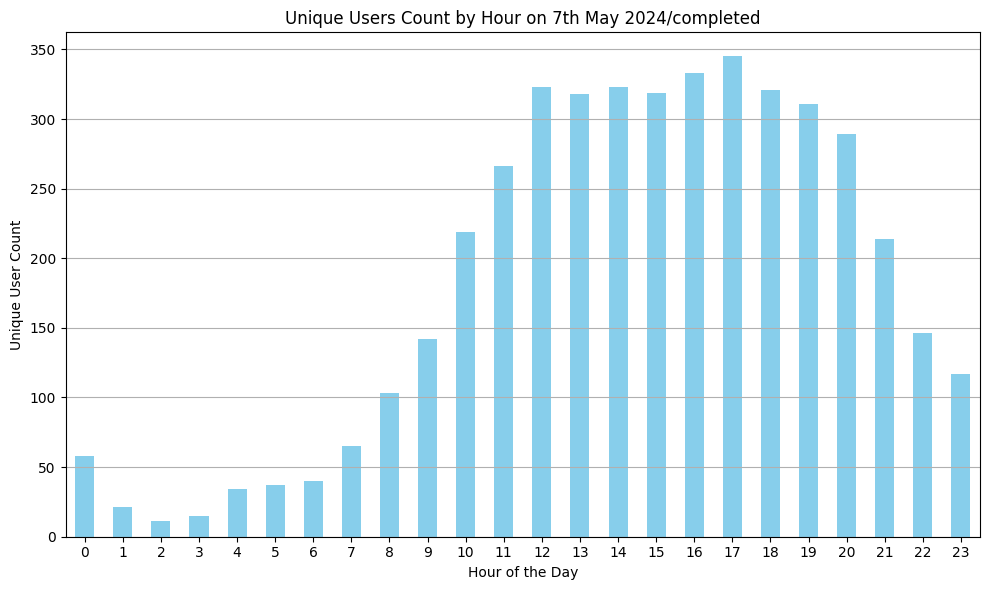

In [26]:
hourly_user_count = particular_day.groupby('hour')['user_id'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))
hourly_user_count.plot(kind='bar', color='skyblue')
plt.title('Unique Users Count by Hour on 7th May 2024/completed')
plt.xlabel('Hour of the Day')
plt.ylabel('Unique User Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2753/883358541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particular_day['hour'] = particular_day['date_column'].dt.hour


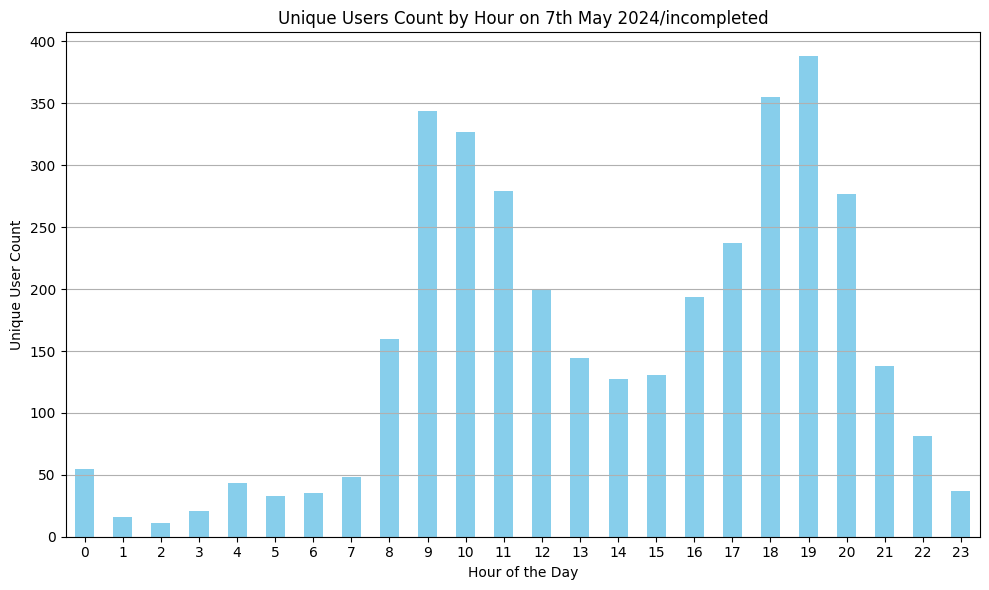

In [27]:
start_date = '2024-05-07 00:00:00'
end_date = '2024-05-07 23:59:59'

particular_day = incompleted_final[(incompleted_final['date_column'] >= start_date) & (incompleted_final['date_column'] <= end_date)]
particular_day['hour'] = particular_day['date_column'].dt.hour
hourly_user_count = particular_day.groupby('hour')['user_id'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))
hourly_user_count.plot(kind='bar', color='skyblue')
plt.title('Unique Users Count by Hour on 7th May 2024/incompleted')
plt.xlabel('Hour of the Day')
plt.ylabel('Unique User Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

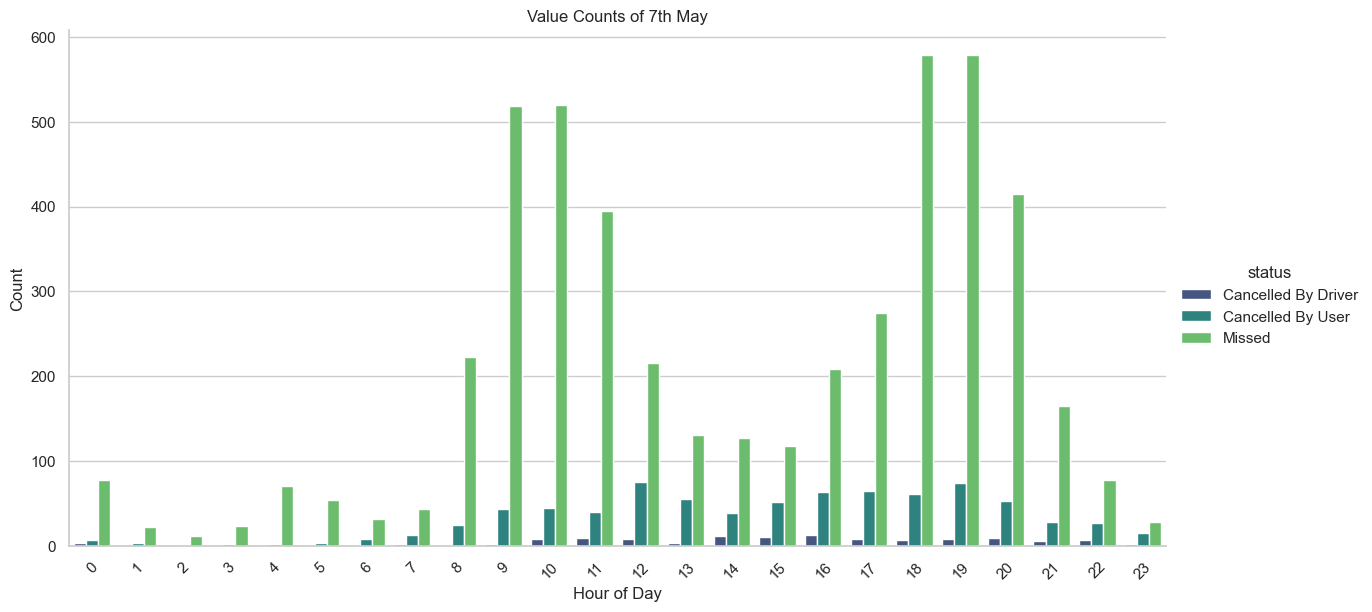

In [28]:
hour_status_counts = particular_day.groupby(['hour', 'status']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Use seaborn's catplot for better handling of multiple categories
g = sns.catplot(
    data=hour_status_counts, kind="bar",
    x="hour", y="count", hue="status",
    height=6, aspect=2, palette="viridis"
)

# Customize the plot
plt.title('Value Counts of 7th May')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [29]:
particular_day = completed_final[(completed_final['date_column'] >= start_date) & (completed_final['date_column'] <= end_date)]
particular_day['hour'] = particular_day['date_column'].dt.hour

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2753/1444742597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particular_day['hour'] = particular_day['date_column'].dt.hour


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_2753/145355760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particular_day['hour'] = particular_day['date_column'].dt.hour


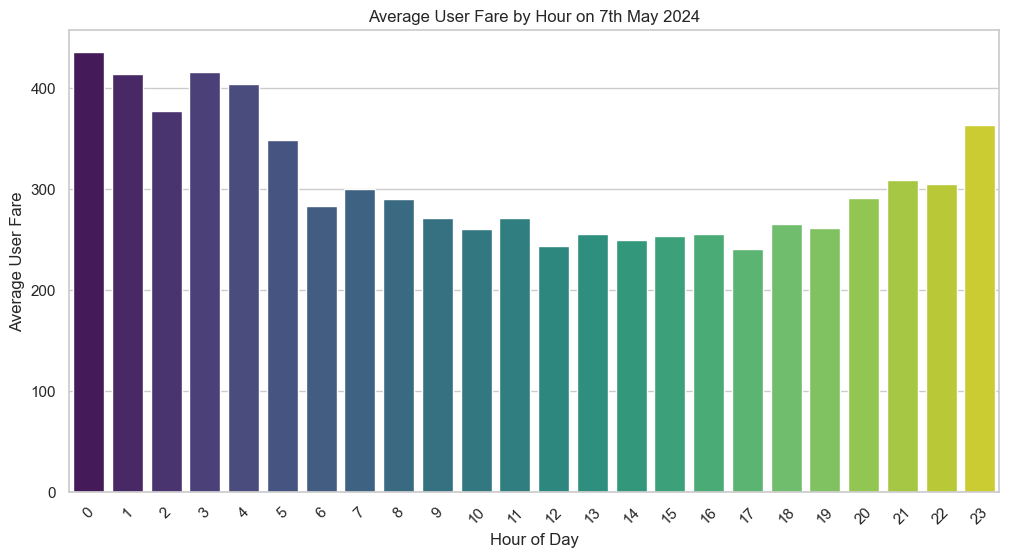

In [30]:
particular_day['hour'] = particular_day['date_column'].dt.hour

# Calculate the average user fare by hour
average_fare_by_hour = particular_day.groupby('hour')['user_fare'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Use seaborn's barplot for better handling of averages
sns.barplot(data=average_fare_by_hour, x='hour', y='user_fare', palette='viridis')

# Customize the plot
plt.title('Average User Fare by Hour on 7th May 2024')
plt.xlabel('Hour of Day')
plt.ylabel('Average User Fare')
plt.xticks(rotation=45)

# Show plot
plt.show()

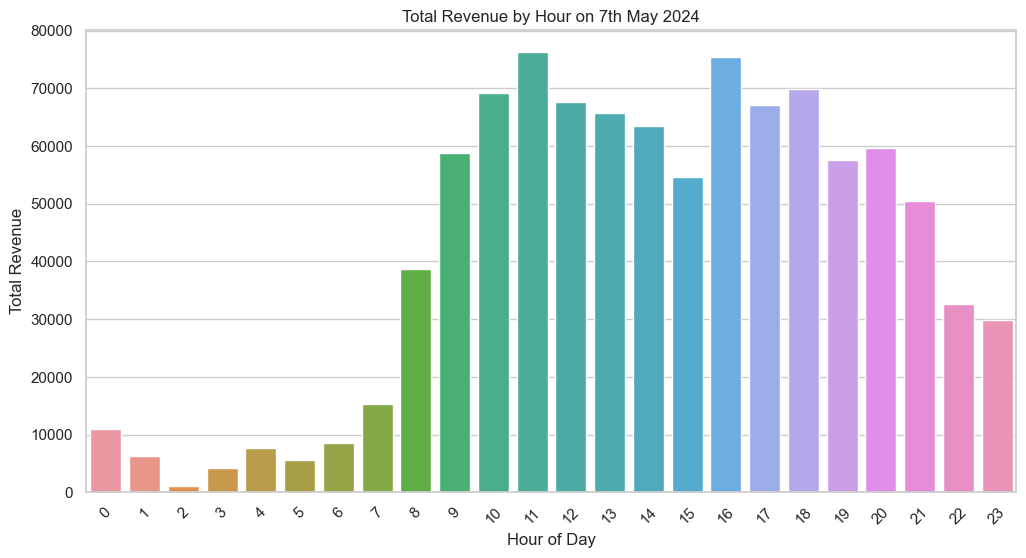

In [31]:
revenue_by_hour = particular_day.groupby('hour').apply(
    lambda x: (x['user_fare'].mean() * x['user_fare'].count())
).reset_index(name='total_revenue')

# Plot the data
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Use seaborn's barplot for better handling of totals
sns.barplot(data=revenue_by_hour, x='hour', y='total_revenue')

# Customize the plot
plt.title('Total Revenue by Hour on 7th May 2024')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [32]:
completed_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137262 entries, 0 to 137261
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   request_made_at         137262 non-null  object        
 1   request_accepted_at     137262 non-null  object        
 2   pickup_time             137262 non-null  object        
 3   ride_end_at             137262 non-null  object        
 4   user_id                 137262 non-null  int64         
 5   ride_id                 137262 non-null  int64         
 6   user_name               137262 non-null  object        
 7   user_phone_no           137262 non-null  object        
 8   driver_id               137262 non-null  int64         
 9   last_login              137262 non-null  object        
 10  vehicle_no              137262 non-null  object        
 11  city_name               137262 non-null  object        
 12  driver_name             137262

In [33]:
completed_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137262 entries, 0 to 137261
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   request_made_at         137262 non-null  object        
 1   request_accepted_at     137262 non-null  object        
 2   pickup_time             137262 non-null  object        
 3   ride_end_at             137262 non-null  object        
 4   user_id                 137262 non-null  int64         
 5   ride_id                 137262 non-null  int64         
 6   user_name               137262 non-null  object        
 7   user_phone_no           137262 non-null  object        
 8   driver_id               137262 non-null  int64         
 9   last_login              137262 non-null  object        
 10  vehicle_no              137262 non-null  object        
 11  city_name               137262 non-null  object        
 12  driver_name             137262

In [34]:
incompleted_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403472 entries, 0 to 403471
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  403472 non-null  int64         
 1   user_phone_no            403472 non-null  object        
 2   ride_id                  403472 non-null  object        
 3   driver_id                403472 non-null  object        
 4   name                     403472 non-null  object        
 5   driver_phone_no          403472 non-null  object        
 6   session_id               403472 non-null  int64         
 7   city_name                403472 non-null  object        
 8   request_made_at          403472 non-null  object        
 9   pickup_lat_long          403472 non-null  object        
 10  pickup_location_address  403472 non-null  object        
 11  status                   403472 non-null  object        
 12  date_column     

In [35]:
dataset=pd.concat([completed_final,incompleted_final],ignore_index=True)

In [36]:
import pandas as pd

dataset['date_column'] = pd.to_datetime(dataset['date_column'])

dataset['10min_window'] = dataset['date_column'].dt.floor('10min')

deduped_data = dataset.sort_values(['user_id', 'date_column']).drop_duplicates(['user_id', '10min_window'], keep='first')

dropped_rows = len(dataset) - len(deduped_data)

print(f"Number of rows dropped: {dropped_rows}")
dataset=deduped_data

Number of rows dropped: 124991


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415743 entries, 222501 to 95752
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   request_made_at          415743 non-null  object        
 1   request_accepted_at      108079 non-null  object        
 2   pickup_time              108079 non-null  object        
 3   ride_end_at              108079 non-null  object        
 4   user_id                  415743 non-null  int64         
 5   ride_id                  415743 non-null  object        
 6   user_name                108079 non-null  object        
 7   user_phone_no            415743 non-null  object        
 8   driver_id                415743 non-null  object        
 9   last_login               108079 non-null  object        
 10  vehicle_no               108079 non-null  object        
 11  city_name                415743 non-null  object        
 12  driver_name      

In [40]:
dataset['date_only'] = dataset['date_column'].dt.date


In [45]:
dataset['date_only'].value_counts().median()

8515.0

In [44]:
dataset['date_only'].value_counts().mean()

8314.86